# Exercício


Neste exercício, tentaremos identificar diferentes `perfis de clientes` de um supermercado. O propósito será de identificar clusters semelhantes para que sejam criadas estratégias de marketing e vendas mais adequadas para cada grupo, incentivando a fidelidade dos clientes e potencializando as vendas.

# Clusterização

## Atividade 1: Crie um dataframe a partir do banco de dados `customer_supermarket`.

O dataset está disponível em [formato .csv](https://drive.google.com/file/d/1L3ohl-YgU5SPcUS2LihG29Kj9XPE6er9/view?usp=share_link) ou em [formato .xlsx](https://docs.google.com/spreadsheets/d/18Cl-4fdjVAV-mKD74zRFpQ9esz_nU7fP/edit?usp=share_link&ouid=111649208388214484177&rtpof=true&sd=true)


Abaixo encontra-se o dicionário de dados:


**Informações Pessoais**

`ID`: Identificador único do cliente

`Year_Birth`: Ano de nascimento do cliente

`Education`: Nível de escolaridade do cliente

`Marital_Status`: Estado civil do cliente

`Income`: Renda familiar anual do cliente

`Kidhome`: Número de filhos na casa do cliente

`Teenhome`: Número de adolescentes na casa do cliente

`Dt_Customer`: Data de cadastro do cliente

`Days_Registered`: Quantidade de Dias desde o cadastro

`Recency`: Número de dias desde a última compra do cliente

`Complain`: 1 se o cliente reclamou nos últimos 2 anos, 0 caso contrário



**Produtos**

`MntWines`: Valor gasto em vinho nos últimos 2 anos

`MntFruits`: Valor gasto em frutas nos últimos 2 anos

`MntMeatProducts`: Valor gasto em carnes nos últimos 2 anos

`MntFishProducts`: Valor gasto em pescados nos últimos 2 anos

`MntSweetProducts`: Valor gasto em doces nos últimos 2 anos

`MntGoldProds`: Valor gasto em ouro nos últimos 2 anos



**Promoções**

`NumDealsPurchases`: Número de compras feitas com desconto

`AcceptedCmp1`: 1 se o cliente aceitou a oferta na 1ª campanha, 0 caso contrário

`AcceptedCmp2`: 1 se o cliente aceitou a oferta na 2ª campanha, 0 caso contrário

`AcceptedCmp3`: 1 se o cliente aceitou a oferta na 3ª campanha, 0 caso contrário

`AcceptedCmp4`: 1 se o cliente aceitou a oferta na 4ª campanha, 0 caso contrário

`AcceptedCmp5`: 1 se o cliente aceitou a oferta na 5ª campanha, 0 caso contrário

`Response`: 1 se o cliente aceitou a oferta na última campanha, 0 caso contrário



**Meios**

`NumWebPurchases`: Número de compras realizadas pelo site da empresa

`NumCatalogPurchases`: Número de compras feitas usando um catálogo

`NumStorePurchases`: Número de compras feitas diretamente nas lojas

`NumWebVisitsMonth`: Número de visitas ao site da empresa no último mês


Obs: este dataset foi `adaptado` a partir do original encontrado no [kaggle](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis).

In [265]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [266]:
df = pd.read_excel('../Data/customer_supermarket.xlsx')

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1965,Graduation,Single,58138.0,0,0,2020-09-04,849,58,...,7,0,0,0,0,0,0,3,11,1
1,2174,1962,Graduation,Single,46344.0,1,1,2022-03-08,299,38,...,5,0,0,0,0,0,0,3,11,0
2,4141,1973,Graduation,Together,71613.0,0,0,2021-08-21,498,26,...,4,0,0,0,0,0,0,3,11,0
3,6182,1992,Graduation,Together,26646.0,1,0,2022-02-10,325,26,...,6,0,0,0,0,0,0,3,11,0
4,5324,1989,PhD,Married,58293.0,1,0,2022-01-19,347,94,...,5,0,0,0,0,0,0,3,11,0


In [267]:
df.shape

(2240, 30)

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Days_Registered      2240 non-null   int64         
 9   Recency              2240 non-null   int64         
 10  MntWines             2240 non-null   int64         
 11  MntFruits            2240 non-null   int64         
 12  MntMeatProducts      2240 non-null   int64         
 13  MntFishProducts      2240 non-nul

In [269]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1976.805804,11.984069,1901.0,1967.00,1978.0,1985.00,2004.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Days_Registered,2240.0,539.582143,202.122512,186.0,366.75,541.5,715.00,885.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0


## Atividade 2: Faça o tratamento dos Dados.
Dica: verifique `dados ausentes` e `outliers` e, se necessário, remova as linhas.

### Dados ausentes

In [270]:
df[df.columns[df.isnull().any()]].isnull().sum()

Income    24
dtype: int64

In [271]:
df[df.columns[df.isnull().any()]].isnull().sum() * 100 / df.shape[0]

Income    1.071429
dtype: float64

In [272]:
df[df.isnull().any(axis = 1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1991,Graduation,Married,NaN,1,0,2021-11-15,412,11,...,7,0,0,0,0,0,0,3,11,0
27,5255,1994,Graduation,Single,NaN,1,0,2021-02-20,680,19,...,1,0,0,0,0,0,0,3,11,0
43,7281,1967,PhD,Single,NaN,0,0,2021-11-05,422,80,...,2,0,0,0,0,0,0,3,11,0
48,7244,1959,Graduation,Single,NaN,2,1,2022-01-01,365,96,...,6,0,0,0,0,0,0,3,11,0
58,8557,1990,Graduation,Single,NaN,1,0,2021-06-17,563,57,...,6,0,0,0,0,0,0,3,11,0
71,10629,1981,2n Cycle,Married,NaN,1,0,2020-09-14,839,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1965,PhD,Married,NaN,2,1,2020-11-19,773,4,...,9,0,0,0,0,0,0,3,11,0
91,9235,1965,Graduation,Single,NaN,1,1,2022-05-27,219,45,...,7,0,0,0,0,0,0,3,11,0
92,5798,1981,Master,Together,NaN,0,0,2021-11-23,404,87,...,1,0,0,0,0,0,0,3,11,0
128,8268,1969,PhD,Married,NaN,0,1,2021-07-11,539,23,...,6,0,0,0,0,0,0,3,11,0


Como a quantidade de valores ausentes representa somente 1% do conjunto de dados decidi então por remove-los

In [273]:
df.dropna(inplace = True)

### Outliers

In [274]:
cols = ['Recency','Days_Registered','Income','MntFruits','MntMeatProducts','MntSweetProducts','MntWines','MntGoldProds']

**Boxplot**

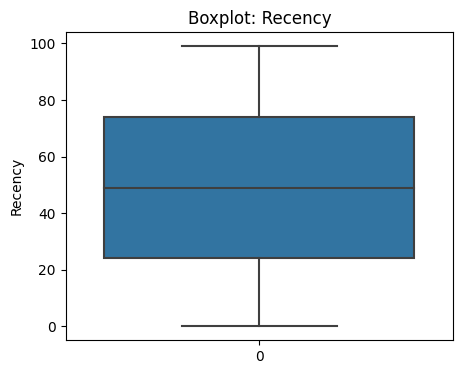

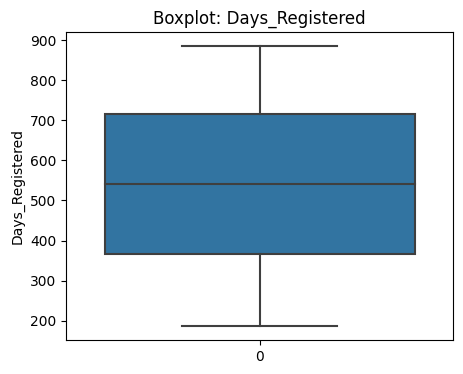

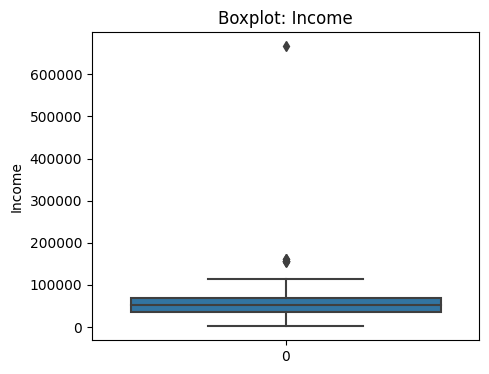

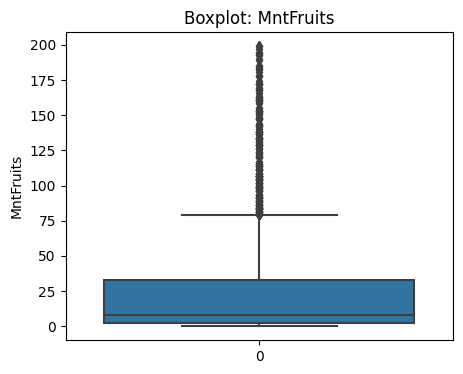

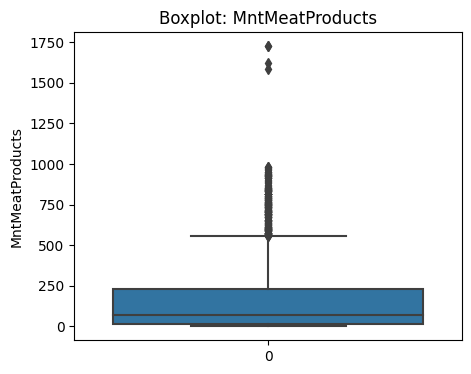

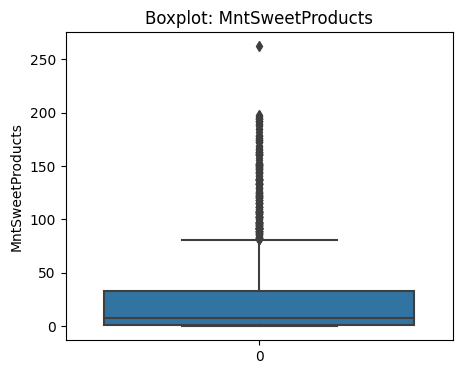

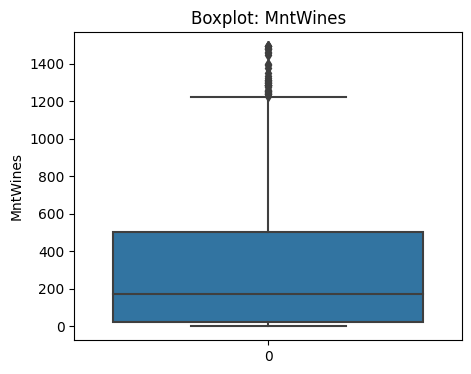

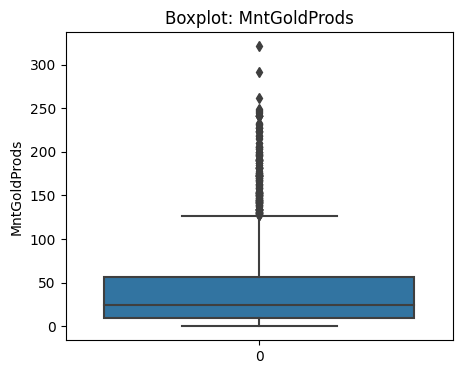

In [275]:
for col in cols:
    plt.figure(figsize=(5,4))
    sns.boxplot(data = df[col]).set(title = f'Boxplot: {col}', ylabel = col)


Como existem muitos valores outliers irei avaliar separadamente cada variável.

**Verificando outliers superiores**

In [276]:
def outlier(df):
  ''' A função retornara os valores considerados outliers inferiores e superiores

    quartil_75 = retorna o quartil 75%
    quartil_25 = retorna o quartil 25%
    intervalo_Interquartil = diferença entre os quartis
    outlier é a diferença de 1,5 vezes a diferença do amplitude interquantil
    C = constante (1.5)

    o output da função é uma tupla com os valores outlier_Inf(outlier inferior) e outlier_Sup (outlier superior).
      ''' 
  quartil_75 = np.quantile(df,0.75)
  quartil_25 = np.quantile(df,0.25)
  c = 1.5
  intervalo_Interquartil =  quartil_75 - quartil_25
  outlier_Sup = quartil_75 + (c * intervalo_Interquartil)
  outlier_Inf = quartil_25 - (c * intervalo_Interquartil)
  return outlier_Inf,outlier_Sup
     

**Income**

In [277]:
outlier_sup = outlier(df['Income'])[1]

In [278]:
df.Income.describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [279]:
df[cols].query('Income > @outlier_sup')

,Recency,Days_Registered,Income,MntFruits,MntMeatProducts,MntSweetProducts,MntWines,MntGoldProds
164,98,306,157243.0,2,1582,2,20,1
617,31,577,162397.0,1,16,1,85,2
655,81,328,153924.0,1,1,1,1,1
687,21,880,160803.0,16,1622,3,55,4
1300,37,576,157733.0,1,9,0,39,8
1653,13,612,157146.0,0,1725,1,1,1
2132,85,490,156924.0,1,2,1,2,1
2233,23,578,666666.0,14,18,1,9,12


Como a váriavel `Income` trata-se da renda familiar anual, é plausivel que existam valores discrepantes, portanto decidi por manter os dados.

**MntFruits**

In [280]:
outlier_sup = outlier(df['MntFruits'])[1]

In [281]:
df.MntFruits.describe()

count    2216.000000
mean       26.356047
std        39.793917
min         0.000000
25%         2.000000
50%         8.000000
75%        33.000000
max       199.000000
Name: MntFruits, dtype: float64

In [282]:
df_prov = df[cols].query('MntFruits > @outlier_sup')\
                  .sort_values(by = 'MntFruits', ascending = False)

df_prov


,Recency,Days_Registered,Income,MntFruits,MntMeatProducts,MntSweetProducts,MntWines,MntGoldProds
1480,25,640,60474.0,199,303,9,265,170
855,25,640,60474.0,199,303,9,265,170
1508,19,433,78931.0,197,170,152,331,35
109,18,755,89058.0,194,106,22,454,43
1526,54,271,82032.0,194,377,125,332,57
...,...,...,...,...,...,...,...,...
1097,71,792,80910.0,80,369,39,160,41
705,93,721,71952.0,80,455,107,656,93
929,6,410,68397.0,80,466,13,760,80
652,63,872,67445.0,80,217,80,757,11


In [283]:
df.shape

(2216, 30)

In [284]:
((df_prov.shape[0] * 100) / df.shape[0])

11.101083032490974

A váriavel `MntFruits` possui 246 valores superior a 1.5x a diferença interquartil, 11.10% do conjunto de dados, porem não os considero valores incorretos pois a renda familiar deste grupo são proximas, e não existe um valor muito discrepante dos demais.

**MntMeatProducts**

In [285]:
outlier_sup = outlier(df['MntMeatProducts'])[1]

In [286]:
df.MntMeatProducts.describe()

count    2216.000000
mean      166.995939
std       224.283273
min         0.000000
25%        16.000000
50%        68.000000
75%       232.250000
max      1725.000000
Name: MntMeatProducts, dtype: float64

In [287]:
df_prov = df[cols].query('MntMeatProducts > @outlier_sup')\
                  .sort_values(by = 'MntMeatProducts', ascending = False)

df_prov

,Recency,Days_Registered,Income,MntFruits,MntMeatProducts,MntSweetProducts,MntWines,MntGoldProds
21,42,725,2447.0,1,1725,1,1,1
1653,13,612,157146.0,0,1725,1,1,1
687,21,880,160803.0,16,1622,3,55,4
164,98,306,157243.0,2,1582,2,20,1
1358,85,368,80695.0,129,984,37,557,18
...,...,...,...,...,...,...,...,...
339,36,462,83532.0,144,562,64,755,224
313,42,694,70893.0,44,561,44,768,14
1528,5,311,74004.0,48,560,176,784,48
689,3,458,69476.0,86,559,9,260,67


In [288]:
((df_prov.shape[0] * 100) / df.shape[0])

7.851985559566787

In [289]:
df_prov.sort_values(by = 'Income')

,Recency,Days_Registered,Income,MntFruits,MntMeatProducts,MntSweetProducts,MntWines,MntGoldProds
21,42,725,2447.0,1,1725,1,1,1
1648,18,593,57136.0,140,599,12,267,127
790,45,716,62847.0,168,706,76,521,61
135,21,655,62981.0,14,590,44,796,0
1809,74,787,63159.0,34,586,86,965,37
...,...,...,...,...,...,...,...,...
650,23,318,98777.0,19,711,115,1000,38
1113,23,318,98777.0,19,711,115,1000,38
1653,13,612,157146.0,0,1725,1,1,1
164,98,306,157243.0,2,1582,2,20,1


In [290]:
df.iloc[[20]]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
21,5376,1987,Graduation,Married,2447.0,1,0,2021-01-06,725,42,...,1,0,0,0,0,0,0,3,11,0


* O usuario de ID 5376 possui uma renda familiar incondizente com o valor gasto em carne, então possivelmente existe um erro na imputação dos dados `MntMeatProducts` deste usuario.

In [291]:
df.drop(labels = 20, inplace = True)

**MntSweetProducts**

In [292]:
outlier_sup = outlier(df['MntSweetProducts'])[1]

In [293]:
df.MntSweetProducts.describe()

count    2215.000000
mean       27.023928
std        41.080658
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       262.000000
Name: MntSweetProducts, dtype: float64

In [294]:
df_prov = df[cols].query('MntSweetProducts > @outlier_sup')\
                  .sort_values(by = 'MntSweetProducts', ascending = False)

df_prov

,Recency,Days_Registered,Income,MntFruits,MntMeatProducts,MntSweetProducts,MntWines,MntGoldProds
1898,9,218,113734.0,2,3,262,6,3
634,12,623,83917.0,22,732,198,514,79
1513,1,249,79529.0,42,706,197,423,197
1671,66,483,86610.0,107,768,196,446,53
1253,92,476,74716.0,27,421,195,133,71
...,...,...,...,...,...,...,...,...
1686,12,876,78789.0,50,850,83,667,83
658,36,488,73059.0,112,420,82,410,71
1630,36,488,73059.0,112,420,82,410,71
116,25,342,90765.0,99,812,82,547,33


In [295]:
((df_prov.shape[0] * 100) / df.shape[0])

11.10609480812641

In [296]:
df_prov.sort_values(by = 'Income')

,Recency,Days_Registered,Income,MntFruits,MntMeatProducts,MntSweetProducts,MntWines,MntGoldProds
817,67,768,22507.0,0,226,157,68,68
1876,15,868,33051.0,71,243,94,100,219
2013,92,704,34445.0,122,122,129,228,30
117,74,681,36550.0,90,94,103,47,120
698,46,424,45938.0,11,178,83,273,29
...,...,...,...,...,...,...,...,...
1113,23,318,98777.0,19,711,115,1000,38
650,23,318,98777.0,19,711,115,1000,38
203,54,790,102160.0,29,138,176,763,58
252,5,636,102692.0,148,444,172,168,148


A váriavel `MntSweetProducts` possui 246 registros com valores superiores a 1.5x o intervalo interquartil, porem avaliando o conjunto de dados com a renda familiar não possivel classifica-los como outliers.

**MntWines**

In [297]:
outlier_sup = outlier(df['MntWines'])[1]

In [298]:
df.MntWines.describe()

count    2215.000000
mean      305.190519
std       337.371947
min         0.000000
25%        24.000000
50%       175.000000
75%       505.000000
max      1493.000000
Name: MntWines, dtype: float64

In [299]:
df_prov = df[cols].query('MntWines > @outlier_sup')\
                  .sort_values(by = 'MntWines', ascending = False)

df_prov

,Recency,Days_Registered,Income,MntFruits,MntMeatProducts,MntSweetProducts,MntWines,MntGoldProds
1749,56,669,80360.0,86,454,43,1493,43
559,61,589,87771.0,38,287,57,1492,33
824,61,589,87771.0,38,287,57,1492,33
2098,60,824,81929.0,55,278,0,1486,185
543,9,512,84169.0,19,403,19,1478,0
917,9,512,84169.0,19,403,19,1478,0
1961,8,541,71670.0,16,128,0,1462,160
1641,71,465,64140.0,0,61,15,1459,215
1488,85,720,76998.0,89,161,35,1449,107
497,83,620,78642.0,0,322,35,1396,17


In [300]:
((df_prov.shape[0] * 100) / df.shape[0])

1.580135440180587

In [301]:
df_prov.shape[0]

35

A váriavel `MntWines` possui 35 registros com valores superiores a 1.5x o intervalo interquartil, porem analisando o conjunto destes dados não possivel indentificar uma discrepancia, portanto não é possivel classificar esses dados como outliers

**MntGoldProds**

In [302]:
outlier_sup = outlier(df['MntGoldProds'])[1]

In [303]:
df.MntGoldProds.describe()

count    2215.000000
mean       43.963431
std        51.827044
min         0.000000
25%         9.000000
50%        24.000000
75%        56.000000
max       321.000000
Name: MntGoldProds, dtype: float64

In [304]:
df_prov = df[cols].query('MntGoldProds > @outlier_sup')\
                  .sort_values(by = 'MntGoldProds', ascending = False)

df_prov

,Recency,Days_Registered,Income,MntFruits,MntMeatProducts,MntSweetProducts,MntWines,MntGoldProds
1975,0,453,4428.0,4,12,4,16,321
1806,92,390,7144.0,4,33,2,81,291
1328,2,385,6560.0,11,26,3,67,262
723,79,687,72190.0,166,597,166,597,249
2173,21,521,71965.0,19,286,38,572,248
...,...,...,...,...,...,...,...,...
2171,77,552,65706.0,10,129,0,918,129
2175,2,720,79174.0,37,518,92,1074,129
2151,4,836,69209.0,32,849,48,496,128
1788,72,856,60839.0,21,128,150,600,128


In [305]:
((df_prov.shape[0] * 100) / df.shape[0])

9.255079006772009

In [306]:
df_prov.sort_values(by = 'Income')

,Recency,Days_Registered,Income,MntFruits,MntMeatProducts,MntSweetProducts,MntWines,MntGoldProds
1975,0,453,4428.0,4,12,4,16,321
1328,2,385,6560.0,11,26,3,67,262
1806,92,390,7144.0,4,33,2,81,291
1284,89,787,26997.0,23,78,49,7,144
1876,15,868,33051.0,71,243,94,100,219
...,...,...,...,...,...,...,...,...
1982,35,323,94642.0,143,797,143,879,143
1473,99,852,94871.0,24,553,0,169,144
124,69,660,101970.0,27,102,72,722,168
252,5,636,102692.0,148,444,172,168,148


* Analisando a váriavel `MntGoldProds` em relação a renda familiar identificou os usuários de ID 10311, 4246 e 6237 que estão discrepantes dos demais, portanto decidi por remove-los pois existe uma possibilidade do valor atribuido a `MntGoldProds` deste usuários estarem incorretos.

In [308]:
df.loc[[1975]]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1975,10311,1977,Graduation,Married,4428.0,0,1,2021-10-05,453,0,...,1,0,0,0,0,0,0,3,11,0


In [309]:
df.drop(labels = 1975, inplace = True)

In [310]:
df.loc[[1328]]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1328,4246,1990,Master,Single,6560.0,0,0,2021-12-12,385,2,...,17,0,0,0,0,0,0,3,11,0


In [311]:
df.drop(labels = 1328, inplace = True)

In [312]:
df.loc[[1806]]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Days_Registered,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
1806,6237,1974,PhD,Single,7144.0,0,2,2021-12-07,390,92,...,0,0,0,0,0,0,0,3,11,0


In [313]:
df.drop(labels = 1806, inplace = True)

In [332]:
df.duplicated().sum()
     

0

In [340]:
df.reset_index(inplace= True)

## Atividade 3: Crie uma nova coluna chamada "MntTotal" que é a soma das colunas "MntFruits", "MntMeatProducts", "MntSweetProducts", "MntWines" e "MntGoldProds"

In [341]:
df['MntTotal'] = df.MntFruits + df.MntMeatProducts + df.MntSweetProducts + df.MntWines + df.MntGoldProds

### Atividade 4: Crie um DataFrame apenas com as colunas `Recency`, `Days_Registered`, `MntTotal` e `Income` e use-o para fazer o agrupamento.

In [342]:
df_2 = df[['Recency','Days_Registered', 'MntTotal', 'Income']]
df_2.head()

,Recency,Days_Registered,MntTotal,Income
0,58,849,1445,58138.0
1,38,299,25,46344.0
2,26,498,665,71613.0
3,26,325,43,26646.0
4,94,347,376,58293.0


### Atividade 5: Padronize os dados.

In [315]:
# seu código

### Atividade 6: Faça um agrupamento hierárquico e plote o dendograma.

In [316]:
# seu código

In [317]:
# seu código

### Atividade 7: Encontre a quantidade que parece adequada para o número de grupos.
Dicas:
* Faça a análise a partir do dendrograma acima, escolha uma quantidade de clusters que parecer adequada e crie uma coluna com o nome `grupos` no dataframe.
* Adicione a coluna `grupos` ao dataframe contendo todas as variáveis (e não somente aquelas utilizadas para os agrupamentos), assim você poderá fazer uma análise mais ampla dos consumidores.
* Para o propósito deste exercício, utilize um `máximo` de 4 grupos para permitir uma boa visualização nas etapas a seguir.

In [318]:
# seu código

### Atividade 8: Crie Gráficos para visualizar os Grupos.

#### Atividade 8.1: Crie Visualizações em Boxplot
Dica: utilize o Seaborn para criar boxplots com os clusters selecionados.

In [319]:
# seu código

In [320]:
# seu código

In [321]:
# seu código

In [322]:
# seu código

#### Atividade 8.2: Crie Histogramas para visualizar os Grupos
Dica: utilize o Seaborn para plotar histogramas dos clusters selecionados.

In [323]:
# seu código

In [324]:
# seu código

In [325]:
# seu código

In [326]:
# seu código

In [327]:
# seu código

In [328]:
# seu código

### Atividade 9: Faça uma análise de cada grupo a fim de criar uma descrição adequada dele (persona).

Descrição dos Grupos:

* O grupo 1 é composto por pessoas que [...].

* O grupo 2 é composto por pessoas que [...].

* O grupo (n) é composto por pessoas que [...].

### Para refletir: 


####Quais outras variáveis poderíamos combinar ou processar para obter análises mais precisas?

Exemplo: e se comparássemos o valor gasto com a faixa de salário para entender esses valores percentualmente?

####Como poderíamos usar uma variável categórica para realizar agrupamento?

Dica:  Pesquise sobre One Hot Encoding